## Probelem Statement:

In this assignment students have to make ARIMA model over shampoo sales
data and check the MSE between predicted and actual value.

In [13]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv('sales-of-shampoo.csv', header=0, parse_dates=True, index_col='Month')
series.head()

,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


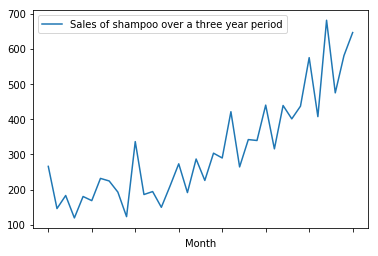

In [14]:
series.plot()
plt.show()

From here we can see that Shampoo sales data has a clear trend, that means time series is not stationary and will require differencing to make it stationary.

In [8]:
X = series.values
X = X[:36]
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

#### Train Test Split:

In [9]:
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [10]:
train, test = X[0:size], X[size:len(X)]

#### Model Preparation:

In [29]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=272.964471, expected=421.600000
predicted=290.313809, expected=264.500000
predicted=349.117623, expected=342.300000
predicted=306.512928, expected=339.700000
predicted=387.376405, expected=440.400000
predicted=348.154206, expected=315.900000
predicted=386.308782, expected=439.300000
predicted=356.082061, expected=401.300000
predicted=446.379487, expected=437.400000
predicted=394.737317, expected=575.500000
predicted=434.915513, expected=407.600000
predicted=507.923355, expected=682.000000
predicted=435.482830, expected=475.300000
predicted=652.743749, expected=581.300000
predicted=546.343527, expected=646.900000
Test MSE: 7547.808


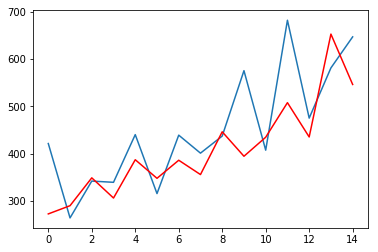

In [34]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Using hit and trial method for hyperparameter tuning:

In [43]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=292.950521, expected=421.600000
predicted=340.286745, expected=264.500000
predicted=384.283321, expected=342.300000
predicted=316.889074, expected=339.700000
predicted=337.349536, expected=440.400000
predicted=378.283213, expected=315.900000
predicted=413.320959, expected=439.300000
predicted=370.978184, expected=401.300000
predicted=425.757070, expected=437.400000
predicted=429.401422, expected=575.500000
predicted=474.580578, expected=407.600000
predicted=542.710036, expected=682.000000
predicted=480.813555, expected=475.300000
predicted=634.327267, expected=581.300000
predicted=561.051415, expected=646.900000
Test MSE: 6417.557


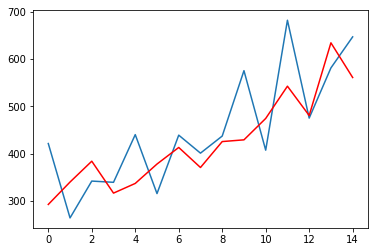

In [44]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# Done !